In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import neattext.functions as ntx
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")
import re
# !pip install neattext

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Read the dataset

In [179]:
df = pd.read_csv("S:\\6th sem\\movie_data.csv")
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


In [180]:
df['review']

0       This movie is just crap. Even though the direc...
1       Another detailed work on the subject by Dr Dwi...
2       THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...
3       Like with any movie genre, there are good gang...
4       I watched it with my mom and we were like...<b...
                              ...                        
4994    Steve Biko was a black activist who tried to r...
4995    I really enjoyed this movie. The acting by the...
4996    the first Child's Play was an original and eff...
4997    This is one of the most unoriginal, cliche-rid...
4998    Can you say "All shock, no plot?" There were s...
Name: review, Length: 4999, dtype: object

In [181]:
def remove_Brackets(text):
    return re.sub("\(.*?\)","()", text)

# Text preprocessing

In [182]:
#removing hashtags
df["cleaned_text"] = df["review"].apply(ntx.remove_hashtags)

#removing userhandles
df["cleaned_text"] = df["cleaned_text"].apply(lambda x: ntx.remove_userhandles(x))

#removing newline and multiple spaces
df = df.replace(r'\\n',' ', regex=True)
df["cleaned_text"] = df["cleaned_text"].apply(ntx.remove_multiple_spaces)

#removing urls and emojies
df["cleaned_text"] = df["cleaned_text"].apply(ntx.remove_urls)
df["cleaned_text"] = df["cleaned_text"].apply(ntx.remove_emojis)

#removing punctuations
df["cleaned_text"] = df["cleaned_text"].apply(ntx.remove_puncts)

#to lowercase
df["cleaned_text"] = df['cleaned_text'].str.lower()

#removing stop words
df["cleaned_text"] = df["cleaned_text"].apply(ntx.remove_stopwords)
# remove html tags
df["cleaned_text"] = df["cleaned_text"].apply(ntx.remove_html_tags) 

# df["cleaned_text"] = df["cleaned_text"].apply(ntx) 
# def remove_Brackets(text):
#     text = re.sub('<[^>]*>', '', text)
#     return text

df["cleaned_text"] = df["cleaned_text"].apply(remove_Brackets) 
# df[["review","cleaned_text"]]

df["cleaned_text"].iloc[4886]

'begin movie bad thisdo mention cast unlikeable heroes overthetop acting dreadful scriptno pays money film poor needs head looking know respect poor guys saw little advance word mags like empire () cinemas start thinking giving refunds customer isnt happy finished producti went days opened mates person cinema bloke ownand cheap nighteither ad campaign failed dismally word spread country stinker isnot days avengers () felt short changed watching movie mate comes round video months sure pays electricity bill watching ittara fitzgerald deserves award cracking walking set keith allen retains dignity amid cinematic carnage barry foster arrested set performance rhys ifans career favours success notting hill dani behr halfway likeable busty secretarymind considering word viewers expectations acting ability pretty low begin withthe production values arent bad considering obviously limited budget script atrocious want hear bunch unlikeable characters fak couple hours right streetotherwise barge

# sentiment Analysis

In [183]:
df = df[["review","sentiment","cleaned_text"]]
# df = df.join(pd.json_normalize(df["sentiment"]))    
df

,review,sentiment,cleaned_text
0,This movie is just crap. Even though the direc...,0,movie crap directors claim oiculture bad direc...
1,Another detailed work on the subject by Dr Dwi...,1,detailed work subject dr dwivedi takes time pr...
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0,cat onine tails () aspect ratio: 235:1 ()sound...
3,"Like with any movie genre, there are good gang...",0,like movie genre good gangster movies bad gang...
4,I watched it with my mom and we were like...<b...,0,watched mom likewhat hell didnt wrong chair de...
...,...,...,...
4994,Steve Biko was a black activist who tried to r...,1,steve biko black activist tried resist white m...
4995,I really enjoyed this movie. The acting by the...,1,enjoyed movie acting adult actors great find m...
4996,the first Child's Play was an original and eff...,1,childs play original effective little horror m...
4997,"This is one of the most unoriginal, cliche-rid...",0,unoriginal clicheridden movies seen didnt like...


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review        4999 non-null   object
 1   sentiment     4999 non-null   int64 
 2   cleaned_text  4999 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [185]:
df["sentiment"] = df["sentiment"].apply(lambda x : 'Positive' if x == 1 else 'Negative' )
df.head()

,review,sentiment,cleaned_text
0,This movie is just crap. Even though the direc...,Negative,movie crap directors claim oiculture bad direc...
1,Another detailed work on the subject by Dr Dwi...,Positive,detailed work subject dr dwivedi takes time pr...
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,Negative,cat onine tails () aspect ratio: 235:1 ()sound...
3,"Like with any movie genre, there are good gang...",Negative,like movie genre good gangster movies bad gang...
4,I watched it with my mom and we were like...<b...,Negative,watched mom likewhat hell didnt wrong chair de...


In [186]:
df['sentiment'].value_counts()

Negative    2500
Positive    2499
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

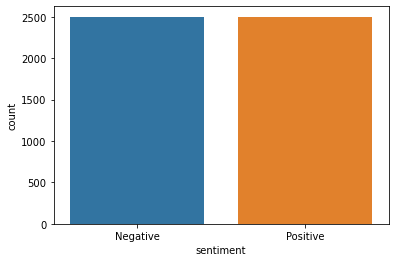

In [187]:
sns.countplot(df["sentiment"])

Splitting The dataset

In [188]:
#split the dataset  
#train dataset
train_tweets=df.cleaned_text[:4000]
train_sentiments=df.sentiment[:4000]
#test dataset
test_tweets=df.cleaned_text[4000:]
test_sentiments=df.sentiment[4000:]
print(train_tweets.shape,train_sentiments.shape)
print(test_tweets.shape,test_sentiments.shape)

(4000,) (4000,)
(999,) (999,)


Tokenization

In [189]:
tokenizer = RegexpTokenizer(r'\w+')

df["tokenized_tweet"] = df["cleaned_text"].apply(lambda x: tokenizer.tokenize(x))
df.head()

,review,sentiment,cleaned_text,tokenized_tweet
0,This movie is just crap. Even though the direc...,Negative,movie crap directors claim oiculture bad direc...,"[movie, crap, directors, claim, oiculture, bad..."
1,Another detailed work on the subject by Dr Dwi...,Positive,detailed work subject dr dwivedi takes time pr...,"[detailed, work, subject, dr, dwivedi, takes, ..."
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,Negative,cat onine tails () aspect ratio: 235:1 ()sound...,"[cat, onine, tails, aspect, ratio, 235, 1, sou..."
3,"Like with any movie genre, there are good gang...",Negative,like movie genre good gangster movies bad gang...,"[like, movie, genre, good, gangster, movies, b..."
4,I watched it with my mom and we were like...<b...,Negative,watched mom likewhat hell didnt wrong chair de...,"[watched, mom, likewhat, hell, didnt, wrong, c..."


Lemmatiztion

In [190]:
# lemmatizer = WordNetLemmatizer()

# def word_lemmatizer(text):
#     lemmatized_text = [lemmatizer.lemmatize(i) for i in text]
#     return lemmatized_text

# df["lemmatized_tweet"] = df["tokenized_tweet"].apply(lambda x: word_lemmatizer(x))

# df

# df["tokenized_tweet"].iloc[100]

# df["lemmatized_tweet"].iloc[100]

# 0.67 % accuracy
# 0.84% on LR

stemming

In [191]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['review']=df['review'].apply(simple_stemmer)

#0.69% accuracy

K-fold validation method

In [198]:
# from sklearn.model_selection import KFold
# folds =  StratifiedKFold(n_splits=5)
# k = 5
# kf = KFold(n_splits=k, random_state=None)
# kf
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(df.cleaned_text,df.sentiment):
    print("Train:", train_index, "testing:", test_index)
    X_train, X_test = df.cleaned_text[train_index], df.cleaned_text[test_index]
    Y_train, Y_test = df.sentiment[train_index], df.sentiment[test_index]

Train: [1245 1246 1248 ... 4996 4997 4998] testing: [   0    1    2 ... 1255 1256 1258]
Train: [   0    1    2 ... 4996 4997 4998] testing: [1245 1246 1248 ... 2525 2532 2533]
Train: [   0    1    2 ... 4996 4997 4998] testing: [2470 2471 2473 ... 3757 3761 3762]
Train: [   0    1    2 ... 3757 3761 3762] testing: [3737 3739 3740 ... 4996 4997 4998]


Test split method

In [199]:
# features = df.cleaned_text
# sentiment = df.sentiment
# X_train,X_test,Y_train,Y_test = train_test_split(features,sentiment,test_size=0.2,random_state=42)

In [200]:
# from sklearn.model_selection import cross_val_score

# # sentiment
# X= df.cleaned_text
# y= df.sentiment
# model = LogisticRegression(solver= 'liblinear')

# result = cross_val_score(model,X,y,cv=kf)
# print(result)
# # print("Avg accuracy: {}".format(result.mean()))
# # cross_val_score(LogisticRegression(),df.cleaned_text,df.sentiment, cv = kf)

Feature Extraction (TF/IDF) & ML model

In [201]:
tvec1=TfidfVectorizer()

#------ Decision Tree--------
# from sklearn.tree import DecisionTreeClassifier
# c1f3=DecisionTreeClassifier()

#-------Logistic Regression-----
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

# #-------Random forest---------
# from sklearn.ensemble import RandomForestClassifier
# clf=RandomForestClassifier(n_estimators=100)

# #-------Support Vector Machine(SVM)-------
# from sklearn import svm
# clf = svm.SVC()

# #-------Gaussian Naive Bayes model--------
# from sklearn.naive_bayes import GaussianNB
# #Create a Gaussian Classifier
# model = GaussianNB()

model = Pipeline([("vectorizer",tvec1),("classifier",logisticRegr)])
model.fit(X_train,Y_train)

predictions=model.predict(X_test)
# cf1=confusion_matrix(predictions,Y_test)

In [202]:
print("Accuracy",accuracy_score(predictions,Y_test))
print("Precision",precision_score(predictions,Y_test,average="weighted"))
print("Recall",recall_score(predictions,Y_test,average="weighted"))
print("F1 Score",f1_score(predictions,Y_test,average="weighted"))

Accuracy 0.8486789431545236
Precision 0.8496083205025557
Recall 0.8486789431545236
F1 Score 0.8487470671068144


In [203]:
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

    Negative       0.83      0.86      0.85       598
    Positive       0.87      0.83      0.85       651

    accuracy                           0.85      1249
   macro avg       0.85      0.85      0.85      1249
weighted avg       0.85      0.85      0.85      1249



 Confusion Matrix

In [140]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions,Y_test)
print(cm)

[[356 163]
 [153 328]]


HeatMap

<AxesSubplot:>

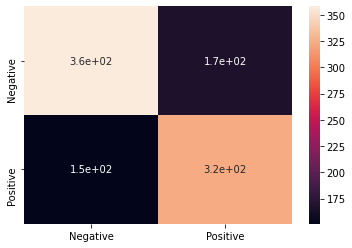

In [95]:
cm_df = pd.DataFrame(cm,index=["Negative","Positive"],columns=["Negative","Positive"])
sns.heatmap(cm_df, annot=True)

In [41]:
model.predict(["movie was bad"])

array(['Negative'], dtype=object)